In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
file_path=('King County Housing May 2014 - May 2015.csv')
data=pd.read_csv(file_path,infer_datetime_format=True,parse_dates=[1])
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\matplotlib\

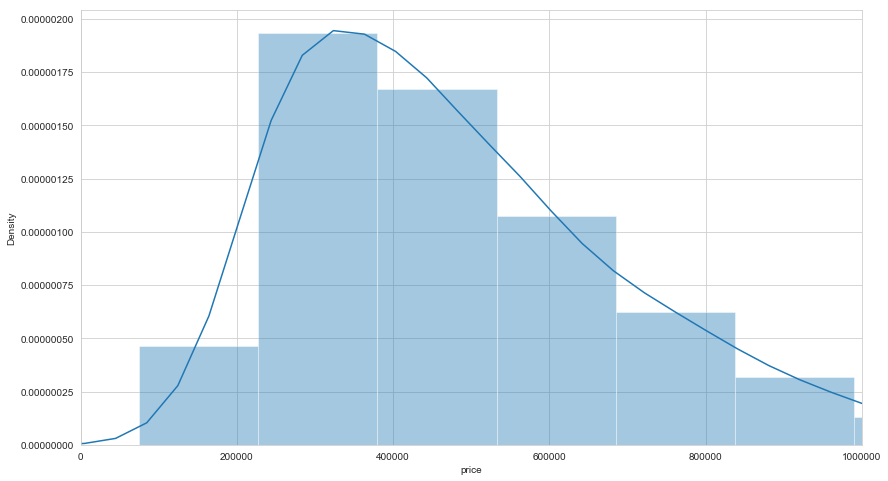

In [11]:
# Sale Price Distribution
fig, ax = plt.subplots(figsize=(14,8))
sns.set_style("whitegrid")
sns.distplot(data['price'])
plt.xlim(0,1000000)
plt.show()

In [6]:
data['price'].idxmax()

7252

In [7]:
data.iloc[7252].to_frame().T

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [8]:
data["price"].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [9]:
print(data['price'].describe().apply(lambda x: '{:,.1f}'.format(x)))

count       21,613.0
mean       540,088.1
std        367,127.2
min         75,000.0
25%        321,950.0
50%        450,000.0
75%        645,000.0
max      7,700,000.0
Name: price, dtype: object


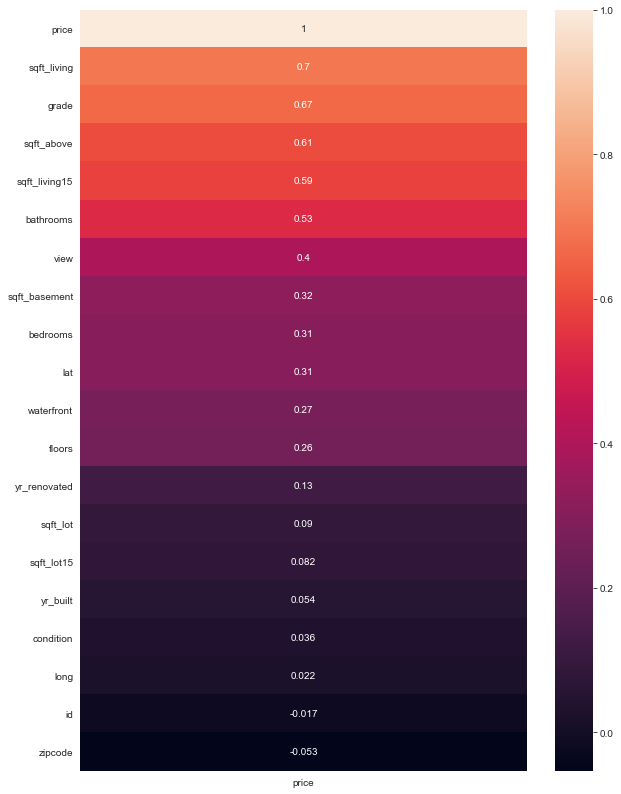

In [25]:
# Correlation to price value using heatmap
fig, ax = plt.subplots(figsize=(10,14))
price_corr = data.corr()[['price']].sort_values(
  by='price', ascending=False)
sns.heatmap(price_corr, annot=True, ax=ax) 

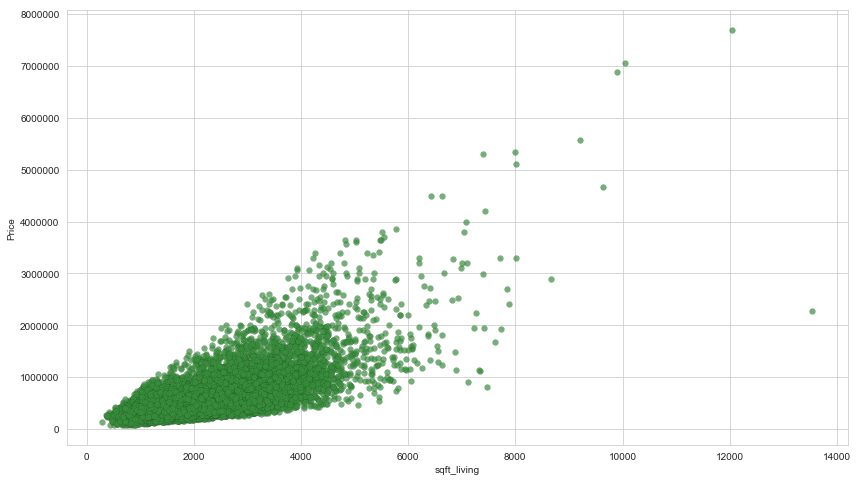

In [13]:
# sqft liveing and price scatter plot
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(x=data['sqft_living'], y=data['price'], color="#388e3c", 
           edgecolors="#000000", linewidths=0.1, alpha=0.7);
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.show()

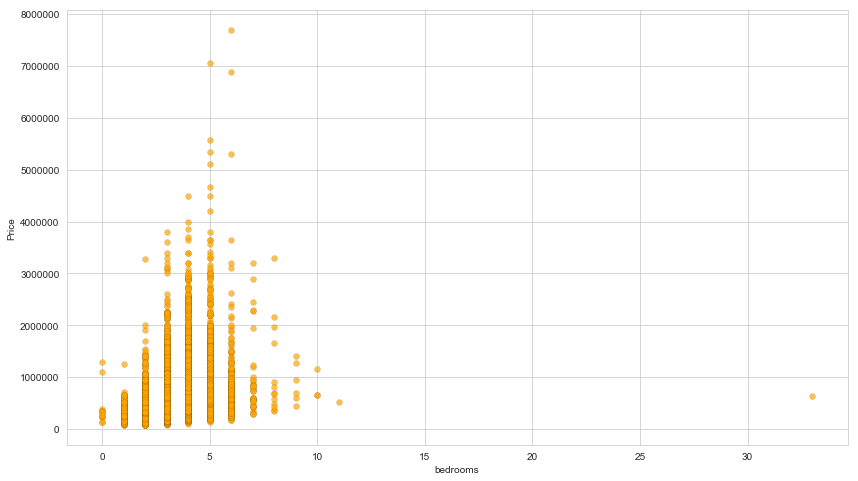

In [12]:
# squarefeet above and price scatter plot
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(x=data['bedrooms'], y=data['price'], color="orange", 
           edgecolors="#000000", linewidths=0.1, alpha=0.7);
plt.xlabel('bedrooms')
plt.ylabel('Price')
plt.show()

# Machine Learning

In [43]:
# decision_tree
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.ensemble import RandomForestClassifie
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [93]:
X = data.copy()
X.drop(["price","id","date"], axis=1, inplace=True)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [94]:
# Define target vector
y = data["price"].values.reshape(-1, 1)
y[:5]

array([[221900.],
       [538000.],
       [180000.],
       [604000.],
       [510000.]])

In [95]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [96]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [97]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [98]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## fitting the decision Tree Model

In [99]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [100]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)



## Making Predictions Using the Tree Model

In [101]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

## Model Evaluaion

In [108]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
#cm_df = pd.DataFrame(
#    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
#)
print(cm)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

## Visualizing the Decision Tree

In [61]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())



NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Saving the tree as PDF
file_path = (loans_tree.pdf")
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = (loans_tree.png")
graph.write_png(file_path)


## Fitting the Random Forest Model


In [14]:
# Define features set
X = data.copy()
X.drop(["price","id","date"], axis=1, inplace=True)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [63]:
# Define target vector
y = data["price"].values.reshape(-1, 1)
y[:5]


array([[221900.],
       [538000.],
       [180000.],
       [604000.],
       [510000.]])

In [64]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [65]:
# Create the StandardScaler instance
scaler = StandardScaler()


In [16]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)



NameError: name 'scaler' is not defined

In [67]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

NameError: name 'X_scaler' is not defined

In [59]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78

SyntaxError: unexpected EOF while parsing (<ipython-input-59-bc5ae33e582a>, line 2)

In [ ]:
# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)



In [ ]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)


## Model Evaluation

Evaluate model's results, by using `sklearn` to calculate the confusion matrix, the accuracy score and to generate the classification report.

In [ ]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


## Making Predictions Using Gradient Boosted Tree Model

In [15]:
X = data.copy()
X.drop(["price","id","date"], axis=1, inplace=True)
X.head()
# Define target vector
y = data["price"].values.reshape(-1, 1)
y[:5]

array([[221900.],
       [538000.],
       [180000.],
       [604000.],
       [510000.]])

In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [ ]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)


In [ ]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

 ### Choose Optimal Learning Rate

In [ ]:
# Choose learning rate
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=learning_rate,
        max_features=2,
        max_depth=3,
        random_state=0)
    model.fit(X_train_scaled,y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        model.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        model.score(
            X_test_scaled,
            y_test.ravel())))
    print()

 ### Build Model with Optimal Learning Rate

In [10]:
# Create GradientBoostingClassifier model
model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=1,
    max_features=5,
    max_depth=3,
    random_state=0)

# Fit the model
model.fit(X_train_scaled,y_train.ravel())

# Score the model
print("Accuracy score (training): {0:.3f}".format(
    model.score(
        X_train_scaled,
        y_train)))
print("Accuracy score (validation): {0:.3f}".format(
    model.score(
        X_test_scaled,
        y_test)))

Accuracy score (training): 1.000
Accuracy score (validation): 0.848


 ### Model Evaluation

In [ ]:
# Generatring the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=[
        "Predicted 0",
        "Predicted 1"
    ]
)

display(cm_df)

In [ ]:
# Generate classification report
print(classification_report(y_test, predictions))